In [1]:
import pandas as pd
import numpy as np

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("hyperthyroidism3_FinalDataSet_April.csv", encoding='latin-1')
df.dropna(inplace=True)


In [3]:
df.head()

,aphp,nhph,tertiary_hp,secondary_hp,age,gender,height,weight,bmi,marital_status,...,nephrolithiasis,bone_specific_alp,corrected_calcium_by_albumin,serum_calcium_phosphorus_ratio,pf_index,alp_combined_with_cl_po4,third_surgery_pathology_report,fourth_surgery_pathology_report,triglycerides,hdl_cholesterol
0,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,0,0,0,60,1,0,0,0.0,1,...,0,0.0,11.2,2.8,147.0,0.0,0,0,0,0
2,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,0,0,0,0,0,-1,0,0,0.0,0,...,-1,0.0,0.0,0.0,0.0,0.0,0,0,0,0
4,1,0,0,0,55,1,170,73,0.0,1,...,0,0.0,12.1,4.4,413.0,0.0,0,0,0,0


In [4]:
y = df.iloc[:, :2].values
X = df.iloc[:, 2:].values

## Splitting & Using XGB


In [5]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import time
def create_multiclass_target(y):
    return np.where((y[:, 0] == 0) & (y[:, 1] == 0), 0,
                    np.where((y[:, 0] == 1) & (y[:, 1] == 1), 1,
                             np.where((y[:, 0] == 0) & (y[:, 1] == 1), 2, 3)))

y_multiclass = create_multiclass_target(y)
 
X_train, X_test, y_train, y_test = train_test_split(X, y_multiclass, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# xgb_classifier = xgb.XGBClassifier()

start_time = time.time()
# xgb_classifier.fit(X_train, y_train_encoded)
end_time = time.time()
training_time = end_time - start_time

print(f"Training time: {training_time} seconds")

# y_pred_encoded = xgb_classifier.predict(X_test)

# y_pred = le.inverse_transform(y_pred_encoded)


Training time: 0.0 seconds


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# param_grid = {
#     'learning_rate': [0.1, 0.01],
#     'n_estimators': [100, 500],
#     'max_depth': [3, 5],
#     'min_child_weight': [1, 3],
#     'gamma': [0, 0.1],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'objective': ['multi:softmax', 'multi:softprob']
# }

# xgb_classifier = xgb.XGBClassifier()
# grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train_encoded)
# print("Best parameters:", grid_search.best_params_)
# best_xgb_classifier = grid_search.best_estimator_
# y_pred_encoded = best_xgb_classifier.predict(X_test)

# print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
# print("Precision = ", precision_score(y_test, y_pred, average='macro'))
# print("Recall = ", recall_score(y_test, y_pred, average='macro'))
# print("F1-score = ", f1_score(y_test, y_pred, average='macro'))

# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

# print("Classification Report:")
# print(classification_report(y_test, y_pred))


Accuracy =  88.0 %
Precision =  0.8626101258581236
Recall =  0.8728514739229025
F1-score =  0.8669554360078554


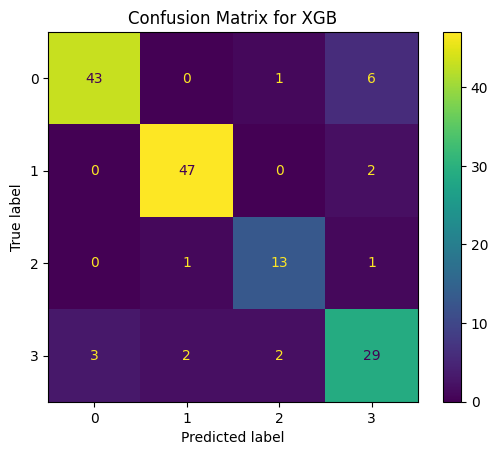

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90        50
           1       0.94      0.96      0.95        49
           2       0.81      0.87      0.84        15
           3       0.76      0.81      0.78        36

    accuracy                           0.88       150
   macro avg       0.86      0.87      0.87       150
weighted avg       0.88      0.88      0.88       150



In [7]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_params = {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 
               'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 
               'objective': 'multi:softmax', 'subsample': 0.8}
xgb_classifier = xgb.XGBClassifier(**best_params)
xgb_classifier.fit(X_train, y_train_encoded)

y_pred_encoded = xgb_classifier.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred, average='macro'))
print("Recall = ", recall_score(y_test, y_pred, average='macro'))
print("F1-score = ", f1_score(y_test, y_pred, average='macro'))

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=np.unique(y_train))
disp.plot()
plt.title('Confusion Matrix for XGB')
plt.show()


print("Classification Report:")
print(classification_report(y_test, y_pred))


## Using Evaluation Metrics

In [8]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
# import matplotlib.pyplot as plt
# from sklearn.model_selection import learning_curve
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# # Calculating using average macro
# print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
# print("Precision = ", precision_score(y_test, y_pred,average='macro'))
# print("Recall = ", recall_score(y_test, y_pred,average='macro'))
# print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
# disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=np.unique(y_train))
# disp.plot()
# plt.title('Confusion Matrix for XGB')
# plt.show()

# print("Classification Report")
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

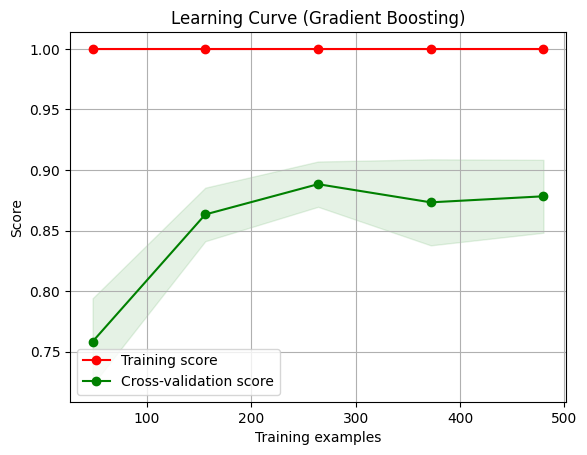

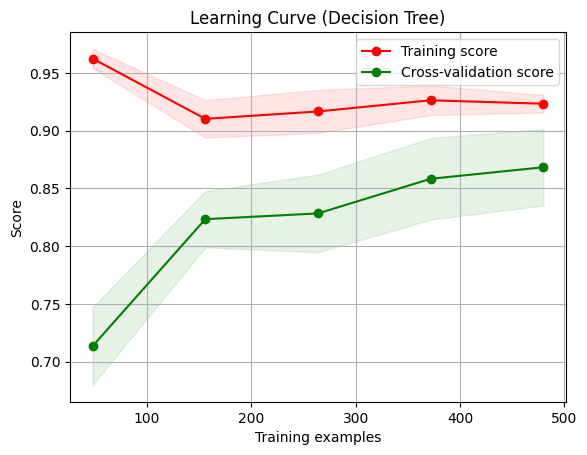

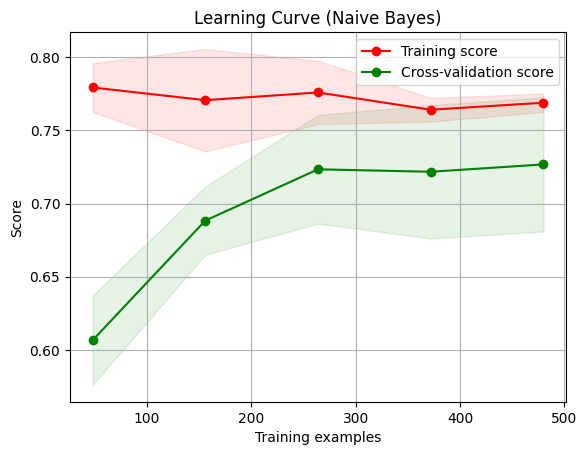

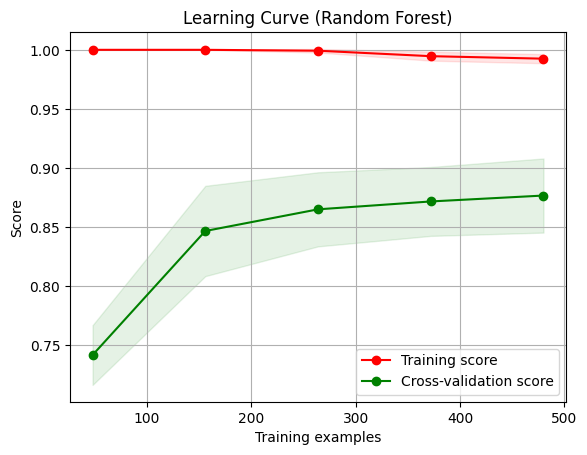

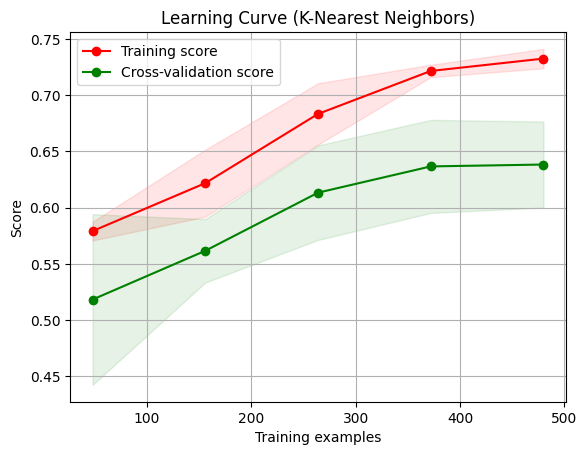

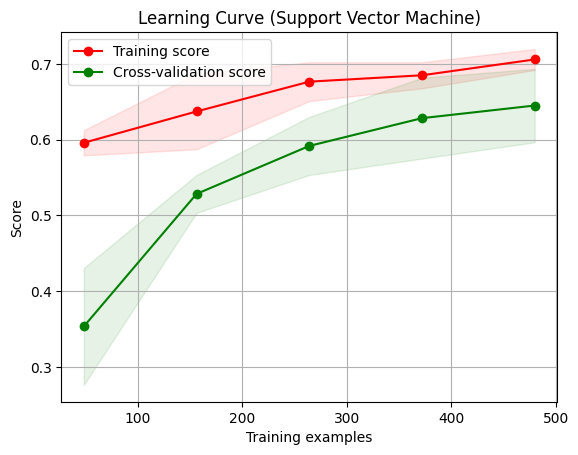

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 22
[LightGBM] [Info] Start training from score -1.673976
[LightGBM] [Info] Start training from score -1.163151
[LightGBM] [Info] Start training from score -2.261763
[LightGBM] [Info] Start training from score -0.926762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

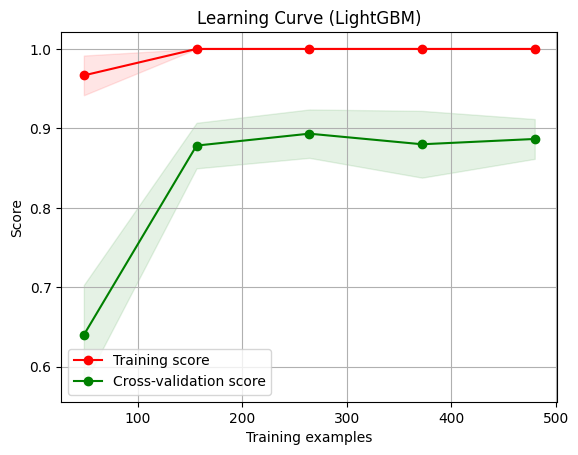

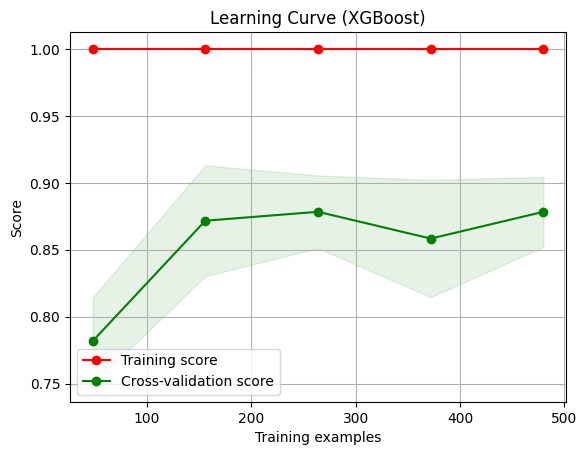

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

def plot_learning_curve(estimator, X, y, title, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X_train, X_test, y_train, y_test = train_test_split(X, y_multiclass, test_size=0.2, random_state=42)

param_grids = {
    "Gradient Boosting": {'n_estimators': 100, 'max_depth': 3},
    "Decision Tree": {'max_depth': 5, 'min_samples_split': 10},
    "Naive Bayes": {},  # No parameters to set for GaussianNB
    "Random Forest": {'n_estimators': 100, 'max_depth': 10},
    "K-Nearest Neighbors": {'n_neighbors': 5},
    "Support Vector Machine": {'C': 1.0, 'kernel': 'rbf'},
    "LightGBM": {'n_estimators': 100, 'max_depth': -1},
    "XGBoost": {'use_label_encoder': False, 'eval_metric': 'mlogloss'}
}

classifiers = {
    "Gradient Boosting": GradientBoostingClassifier(**param_grids["Gradient Boosting"]),
    "Decision Tree": DecisionTreeClassifier(**param_grids["Decision Tree"]),
    "Naive Bayes": GaussianNB(**param_grids["Naive Bayes"]),
    "Random Forest": RandomForestClassifier(**param_grids["Random Forest"]),
    "K-Nearest Neighbors": KNeighborsClassifier(**param_grids["K-Nearest Neighbors"]),
    "Support Vector Machine": SVC(**param_grids["Support Vector Machine"]),
    "LightGBM": LGBMClassifier(**param_grids["LightGBM"]),
    "XGBoost": XGBClassifier(**param_grids["XGBoost"])
}

for name, clf in classifiers.items():
    plot_learning_curve(clf, X_train, y_train, title=f"Learning Curve ({name})")
    plt.show()
